In [9]:
import pandas as pd
from google.colab import files

# Load all the spreadsheets
students = pd.read_csv("/content/Students.csv")
instructors = pd.read_csv("/content/Instructors.csv")
courses = pd.read_csv("/content/Courses.csv")
reviews = pd.read_csv("/content/Reviews.csv")

# Add sentiment label
reviews["sentiment_label"] = reviews["rating_score"].apply(
    lambda x: "Negative" if x <= 2 else "Neutral" if x == 3 else "Positive"
)

# Merge all tables
merged = reviews.merge(students, on="student_id", how="left")
merged = merged.merge(instructors, on="instructor_id", how="left")
merged = merged.merge(courses, on="course_id", how="left")

# Save merged table to Colab's file system
merged_csv_path = "/content/Merged_All_Data.csv"
merged.to_csv(merged_csv_path, index=False)

# Download the file to your computer
files.download(merged_csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Load the merged dataset for deep cleaning
merged_df = pd.read_csv("/content/Merged_All_Data.csv")

In [12]:
merged_df.head()

,review_id,student_id,instructor_id,course_id,review_text,review_date,rating_score,response_time,sentiment_label,region,...,full_name,country,experience_years,course_count,avg_response_time,title,category,language,duration_hours,level
0,1,2889,21,69,The instructor was very clear and made the cou...,3/4/2025,5,17.74,Positive,South America,...,Anita Murphy,Indonesia,7,4,23.86,Horizontal didactic structure,Health,English,33.7,Intermediate
1,2,2581,46,130,Too fast-paced and lacked clear explanations.,10/11/2024,2,10.87,Negative,South America,...,Chad Barron,Belgium,18,1,5.26,Enhanced web-enabled frame,Business,Spanish,14.1,Beginner
2,3,344,48,20,Not engaging at all. I struggled to stay focus...,3/5/2025,1,4.10,Negative,South America,...,Kenneth Hernandez,Congo,13,4,32.77,Triple-buffered asymmetric neural-net,Creative,German,35.3,Intermediate
3,4,2,70,145,"The instructor was fine, but the pace felt a b...",5/20/2024,3,66.74,Neutral,Europe,...,Janice Perez,Cambodia,7,3,22.64,Monitored mobile utilization,Business,French,10.4,Beginner
4,5,1668,48,58,"The course was okay, but I expected more pract...",3/28/2025,3,29.10,Neutral,Asia,...,Kenneth Hernandez,Congo,13,4,32.77,Upgradable intermediate approach,Tech,French,33.6,Advanced


#Step 1: Preview basic structure and summary

In [13]:
structure_info = merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           10000 non-null  int64  
 1   student_id          10000 non-null  int64  
 2   instructor_id       10000 non-null  int64  
 3   course_id           10000 non-null  int64  
 4   review_text         10000 non-null  object 
 5   review_date         10000 non-null  object 
 6   rating_score        10000 non-null  int64  
 7   response_time       10000 non-null  float64
 8   sentiment_label     10000 non-null  object 
 9   region              10000 non-null  object 
 10  device_type         10000 non-null  object 
 11  completed_courses   10000 non-null  int64  
 12  satisfaction_score  10000 non-null  float64
 13  full_name           10000 non-null  object 
 14  country             10000 non-null  object 
 15  experience_years    10000 non-null  int64  
 16  cours

In [14]:
null_summary = merged_df.isnull().sum()

In [15]:
null_summary

,0
review_id,0
student_id,0
instructor_id,0
course_id,0
review_text,0
review_date,0
rating_score,0
response_time,0
sentiment_label,0
region,0


In [16]:
head_preview = merged_df.head()

In [17]:
head_preview

,review_id,student_id,instructor_id,course_id,review_text,review_date,rating_score,response_time,sentiment_label,region,...,full_name,country,experience_years,course_count,avg_response_time,title,category,language,duration_hours,level
0,1,2889,21,69,The instructor was very clear and made the cou...,3/4/2025,5,17.74,Positive,South America,...,Anita Murphy,Indonesia,7,4,23.86,Horizontal didactic structure,Health,English,33.7,Intermediate
1,2,2581,46,130,Too fast-paced and lacked clear explanations.,10/11/2024,2,10.87,Negative,South America,...,Chad Barron,Belgium,18,1,5.26,Enhanced web-enabled frame,Business,Spanish,14.1,Beginner
2,3,344,48,20,Not engaging at all. I struggled to stay focus...,3/5/2025,1,4.10,Negative,South America,...,Kenneth Hernandez,Congo,13,4,32.77,Triple-buffered asymmetric neural-net,Creative,German,35.3,Intermediate
3,4,2,70,145,"The instructor was fine, but the pace felt a b...",5/20/2024,3,66.74,Neutral,Europe,...,Janice Perez,Cambodia,7,3,22.64,Monitored mobile utilization,Business,French,10.4,Beginner
4,5,1668,48,58,"The course was okay, but I expected more pract...",3/28/2025,3,29.10,Neutral,Asia,...,Kenneth Hernandez,Congo,13,4,32.77,Upgradable intermediate approach,Tech,French,33.6,Advanced


# 2 Step-by-step deep cleaning process

In [18]:
# Step 1: Convert review_date to datetime
merged_df["review_date"] = pd.to_datetime(merged_df["review_date"], errors='coerce')

# Step 2: Clean text fields
text_columns = ["review_text", "sentiment_label", "region", "device_type",
                "full_name", "country", "title", "category", "language", "level"]
for col in text_columns:
    merged_df[col] = merged_df[col].astype(str).str.strip().str.title()

# Step 3: Remove duplicates
merged_df = merged_df.drop_duplicates()

# Step 4: Optional - Remove negative response times or out-of-range ratings
merged_df = merged_df[merged_df["rating_score"].between(1, 5)]
merged_df = merged_df[merged_df["response_time"] >= 0]

# Step 5: Save cleaned file
cleaned_file_path = "/content/Cleaned_Merged_All_Data.csv"
merged_df.to_csv(cleaned_file_path, index=False)

# Step 6: Download the file to your computer
files.download(cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load the cleaned data
df = pd.read_csv("/content/Cleaned_Merged_All_Data.csv")

In [22]:
# Set up the visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6));

<Figure size 1200x600 with 0 Axes>

<ipython-input-23-7a6f7fe286ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='Set2')


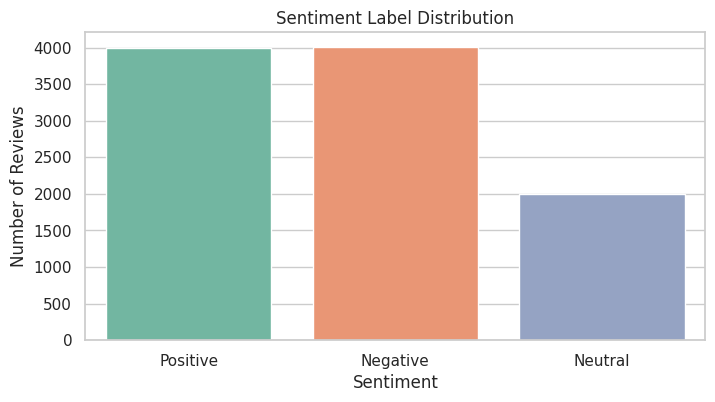

In [23]:
# 1. Sentiment distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='sentiment_label', data=df, palette='Set2')
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

<ipython-input-24-a0f86cc97d3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_instructors.values, y=top_instructors.index, palette="Blues_d")


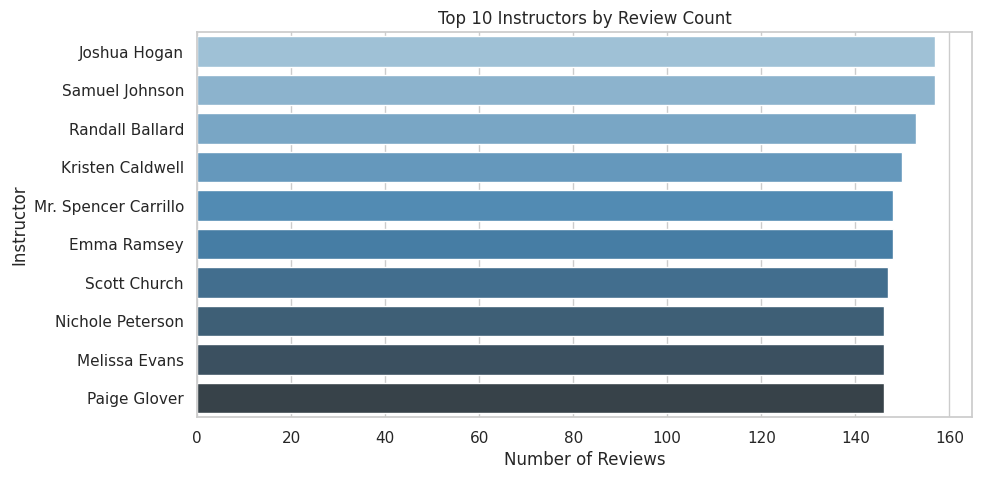

In [24]:
# 2. Top 10 instructors by number of reviews
plt.figure(figsize=(10, 5))
top_instructors = df['full_name'].value_counts().head(10)
sns.barplot(x=top_instructors.values, y=top_instructors.index, palette="Blues_d")
plt.title("Top 10 Instructors by Review Count")
plt.xlabel("Number of Reviews")
plt.ylabel("Instructor")
plt.show()

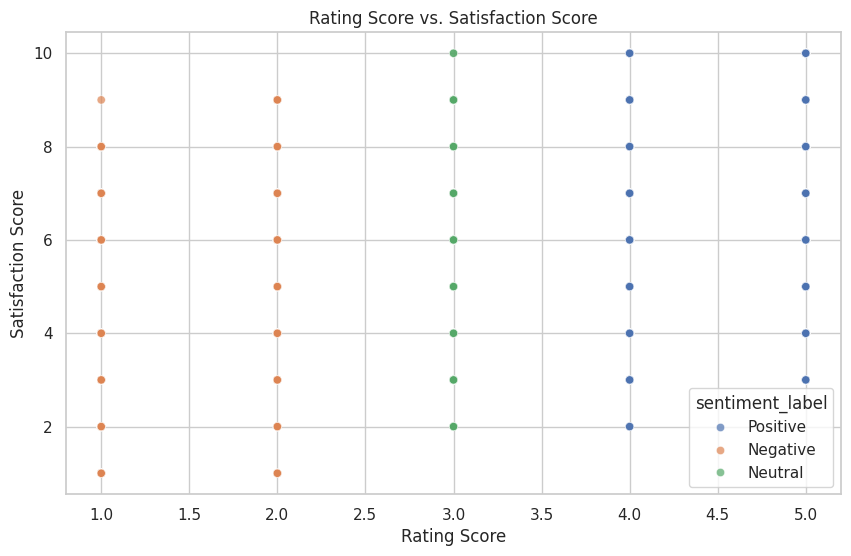

In [25]:
# 3. Average Rating vs Satisfaction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_score', y='satisfaction_score', hue='sentiment_label', data=df, alpha=0.7)
plt.title("Rating Score vs. Satisfaction Score")
plt.xlabel("Rating Score")
plt.ylabel("Satisfaction Score")
plt.show()

<ipython-input-27-bd100b874e8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response.values, y=avg_response.index, palette="Reds")


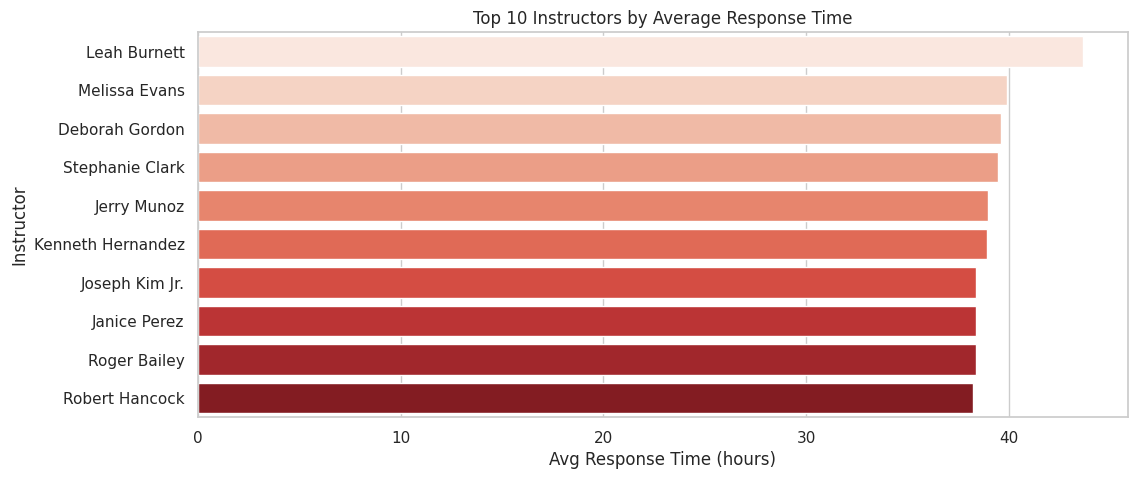

In [27]:
# 4. Average response time per instructor (Top 10)
plt.figure(figsize=(12, 5))
avg_response = df.groupby('full_name')['response_time'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_response.values, y=avg_response.index, palette="Reds")
plt.title("Top 10 Instructors by Average Response Time")
plt.xlabel("Avg Response Time (hours)")
plt.ylabel("Instructor")
plt.show();

<ipython-input-28-c92a122876b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="Set1")


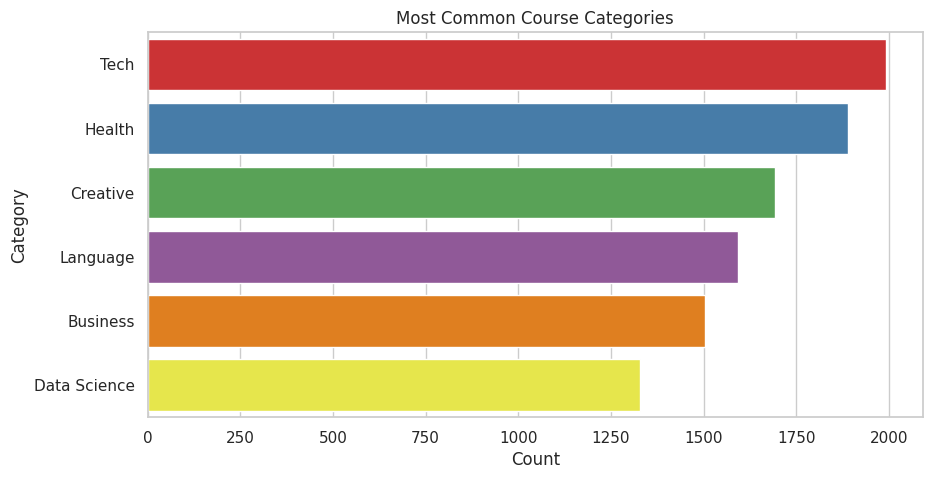

In [28]:
# 5. Most common course categories
plt.figure(figsize=(10, 5))
category_counts = df['category'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index, palette="Set1")
plt.title("Most Common Course Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

📊 Visualizations Included:
Sentiment distribution

Top instructors by review count

Rating vs satisfaction score (scatter)

Average response time per instructor

Most common course categories

This heatmap will show the relationships between numerical features such as:

rating_score

response_time

satisfaction_score

completed_courses

avg_response_time

duration_hours

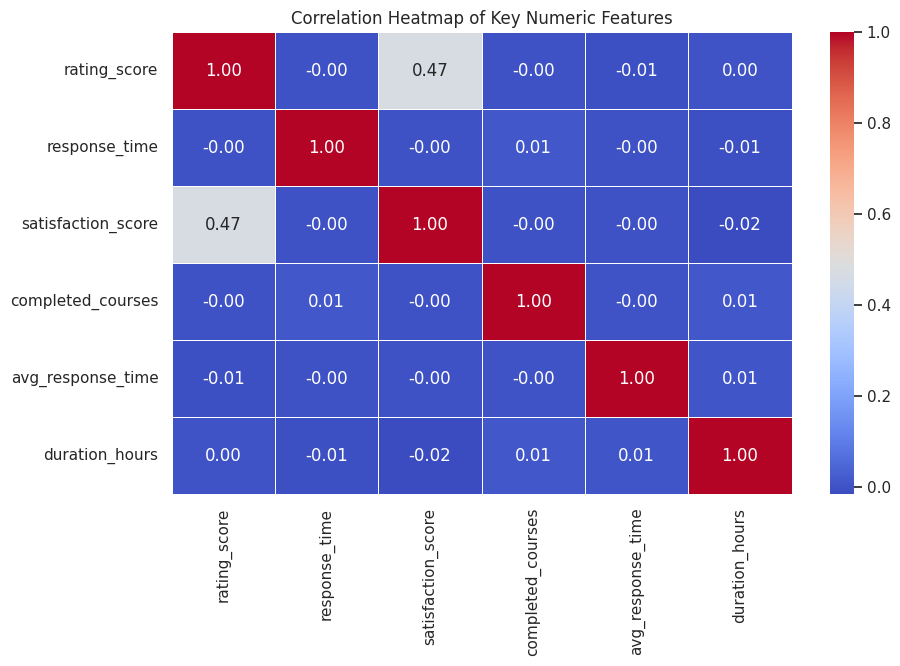

In [29]:
# Load the cleaned dataset
df = pd.read_csv("/content/Cleaned_Merged_All_Data.csv")

# Select only the numeric columns of interest
numeric_cols = [
    'rating_score',
    'response_time',
    'satisfaction_score',
    'completed_courses',
    'avg_response_time',
    'duration_hours'
]

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()


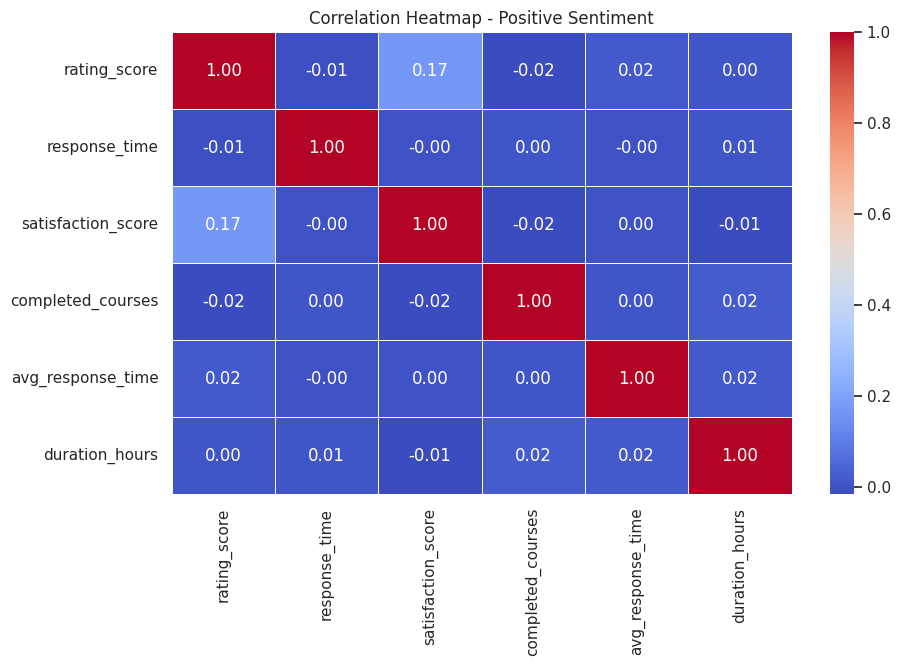

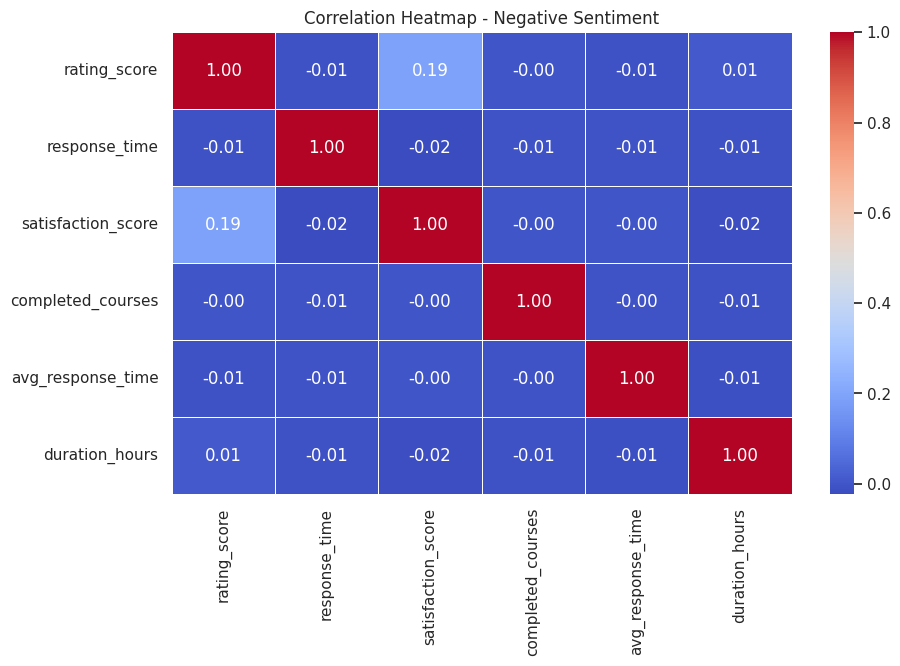

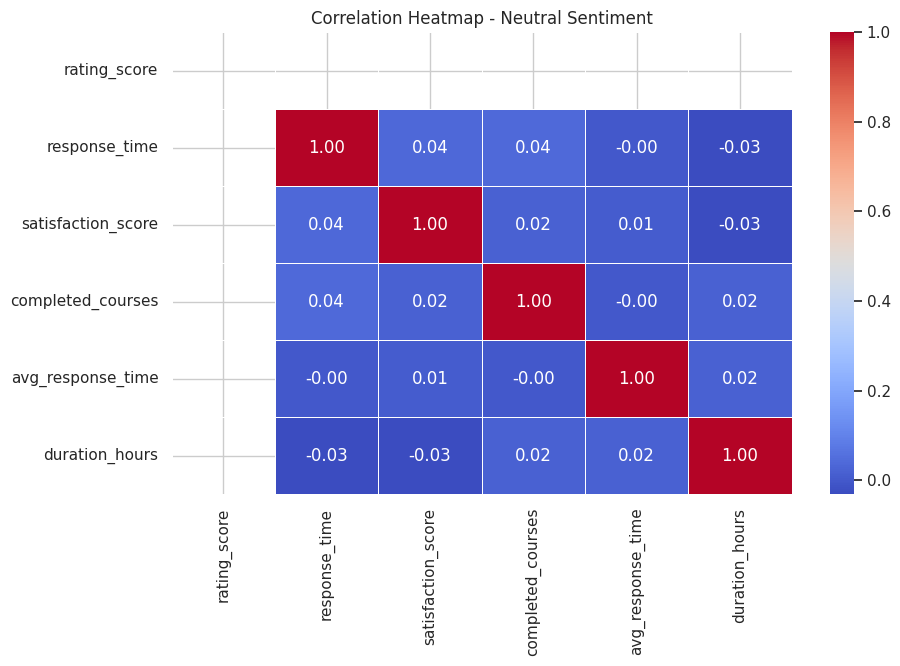

In [30]:
# Load your cleaned dataset
df = pd.read_csv("/content/Cleaned_Merged_All_Data.csv")

# Define the numeric columns of interest
numeric_cols = [
    'rating_score',
    'response_time',
    'satisfaction_score',
    'completed_courses',
    'avg_response_time',
    'duration_hours'
]

# Get unique sentiment labels
sentiments = df['sentiment_label'].unique()

# Create a heatmap for each sentiment
for sentiment in sentiments:
    subset = df[df['sentiment_label'] == sentiment]
    corr_matrix = subset[numeric_cols].corr()

    # Plot
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap - {sentiment} Sentiment")
    plt.show()


<Figure size 1400x700 with 0 Axes>

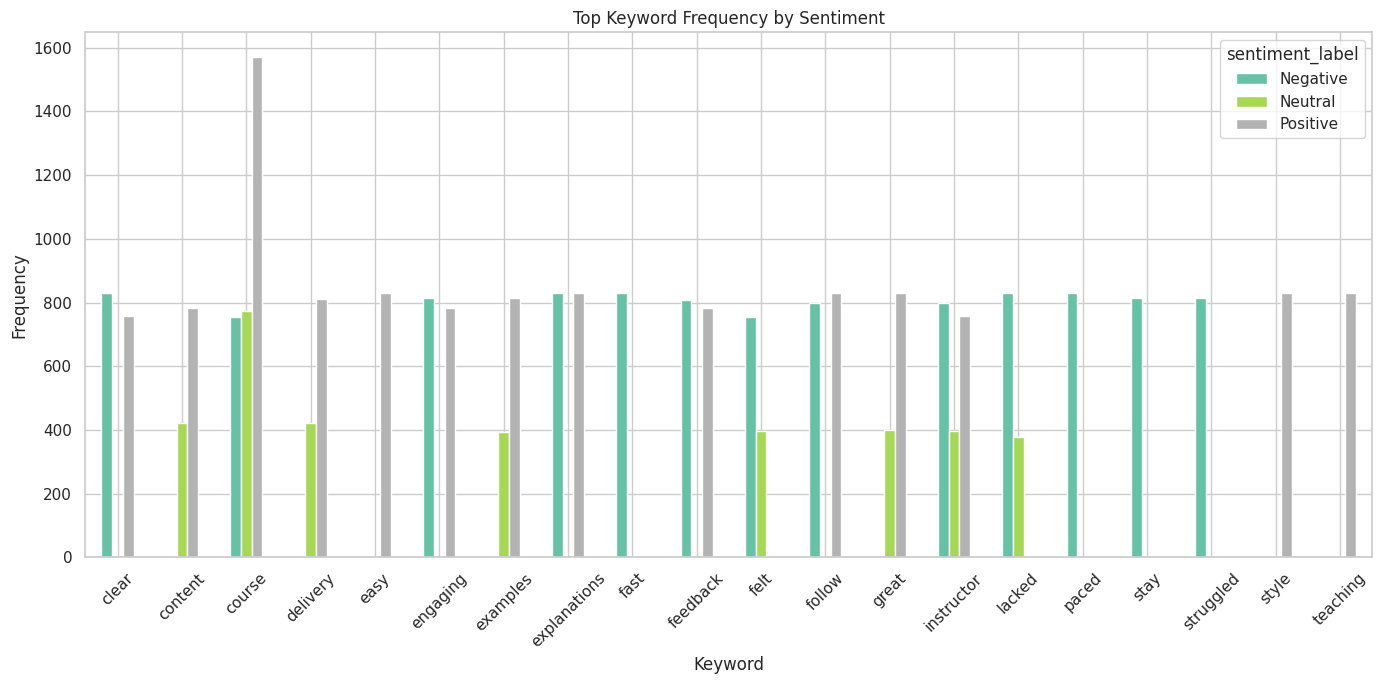

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
df = pd.read_csv("/content/Cleaned_Merged_All_Data.csv")

# Drop NaNs just in case
df = df.dropna(subset=['review_text', 'sentiment_label'])

# Step 1: Extract keywords using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['review_text'])

# Step 2: Convert to DataFrame and add sentiment labels
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
keywords_df['sentiment_label'] = df['sentiment_label'].values

# Step 3: Group by sentiment and sum
grouped = keywords_df.groupby('sentiment_label').sum().T

# Step 4: Plot the grouped bar chart
plt.figure(figsize=(14, 7))
grouped.plot(kind='bar', figsize=(14, 7), colormap='Set2')
plt.title("Top Keyword Frequency by Sentiment")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📊 What This Shows:
The top 20 words found in student reviews

How often each is used in positive, neutral, and negative reviews

A side-by-side comparison for each keyword

Preprocess and clean review_text

Vectorize the text using TF-IDF

Optionally include metadata (e.g., course category, instructor_id)

Train a Logistic Regression model

Evaluate with accuracy, precision, recall

Predict sentiment for new reviews

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       819
     Neutral       1.00      1.00      1.00       391
    Positive       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



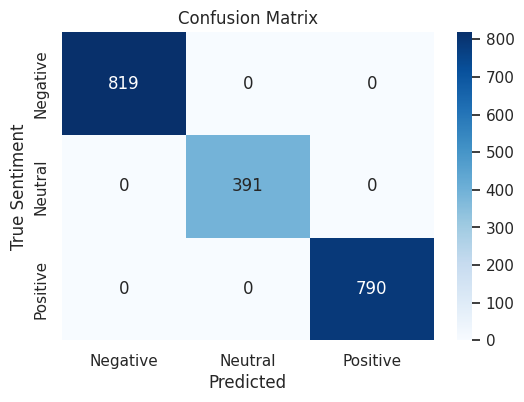

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Cleaned_Merged_All_Data.csv")

# Drop rows with missing review text or sentiment
df = df.dropna(subset=["review_text", "sentiment_label"])

# Optional: encode metadata (e.g., instructor_id and category)
df["instructor_id"] = df["instructor_id"].astype(str)
df["category"] = df["category"].astype(str)

# Combine review text + metadata (optional)
df["full_text"] = df["review_text"] + " category_" + df["category"] + " instructor_" + df["instructor_id"]

# Encode target labels
le = LabelEncoder()
df["sentiment_encoded"] = le.fit_transform(df["sentiment_label"])  # Negative=0, Neutral=1, Positive=2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df["full_text"], df["sentiment_encoded"], test_size=0.2, random_state=42)

# TF-IDF + Logistic Regression pipeline
model = make_pipeline(
    TfidfVectorizer(stop_words="english", max_features=3000),
    LogisticRegression(max_iter=200)
)

# Train model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True Sentiment")
plt.title("Confusion Matrix")
plt.show()


i ambuilding a sentiment prediction pipeline, and you want to compare multiple ML models to see which one performs best.

Here’s a full, organized code in Google Colab that:

Uses TF-IDF to vectorize review_text

Trains and compares 4 model candidates:

Logistic Regression ✅

Naive Bayes 🧠

Support Vector Machine (SVM) 💻

Random Forest 🌲

Outputs accuracy and classification reports for each

Visualizes a confusion matrix for each

🔍 Training: Logistic Regression
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       819
     Neutral       1.00      1.00      1.00       391
    Positive       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



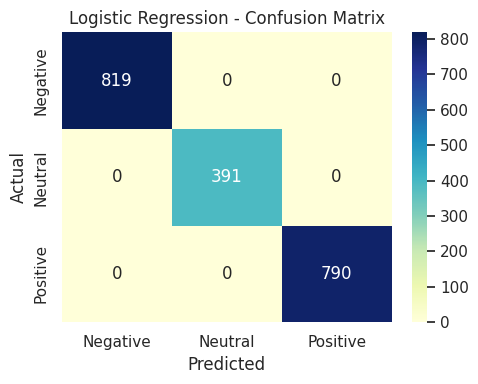

🔍 Training: Naive Bayes
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       819
     Neutral       1.00      1.00      1.00       391
    Positive       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



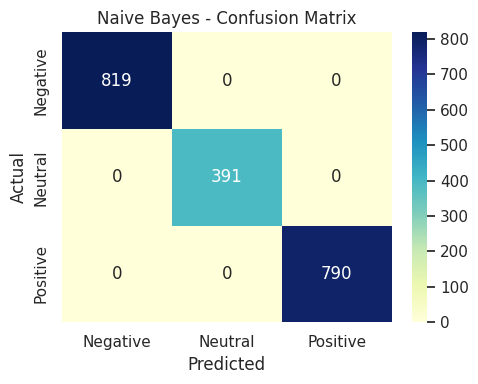

🔍 Training: SVM
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       819
     Neutral       1.00      1.00      1.00       391
    Positive       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



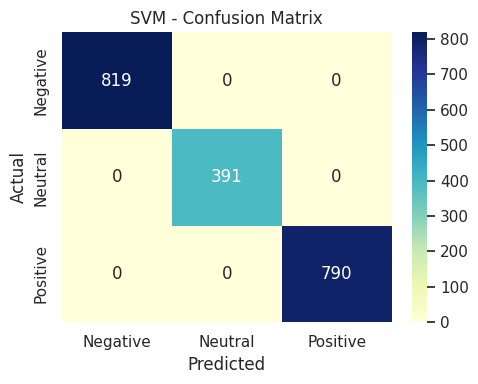

🔍 Training: Random Forest
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       819
     Neutral       1.00      1.00      1.00       391
    Positive       1.00      1.00      1.00       790

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



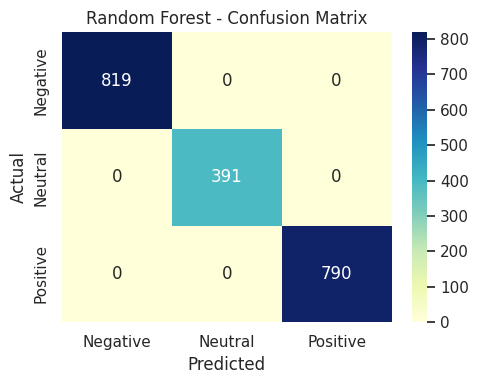

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Cleaned_Merged_All_Data.csv")
df = df.dropna(subset=["review_text", "sentiment_label"])

# Encode target labels
le = LabelEncoder()
df["sentiment_encoded"] = le.fit_transform(df["sentiment_label"])

# Optional: use instructor/category as extra text features
df["instructor_id"] = df["instructor_id"].astype(str)
df["category"] = df["category"].astype(str)
df["full_text"] = df["review_text"] + " category_" + df["category"] + " instructor_" + df["instructor_id"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df["full_text"], df["sentiment_encoded"], test_size=0.2, random_state=42)

# Define model candidates
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store results
results = {}

# Loop through models
for name, model in models.items():
    print(f"🔍 Training: {name}")

    pipeline = make_pipeline(
        TfidfVectorizer(stop_words="english", max_features=3000),
        model
    )
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Save result
    results[name] = {
        "model": pipeline,
        "accuracy": acc,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(results[name]["confusion_matrix"], annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


✅ Full Evaluation Metrics

Metric	Why It’s Useful

✅ Accuracy	General performance across all classes

✅ Precision, Recall, F1	Especially important for imbalanced classes like "Negative"

✅ Confusion Matrix	Shows true vs. predicted breakdown

✅ ROC-AUC	Great for visualizing class separation (works best with
 2-class but possible for multi-class too)


🎯 ROC-AUC by Class:
Negative: 1.000
Neutral: 1.000
Positive: 1.000


<Figure size 800x600 with 0 Axes>

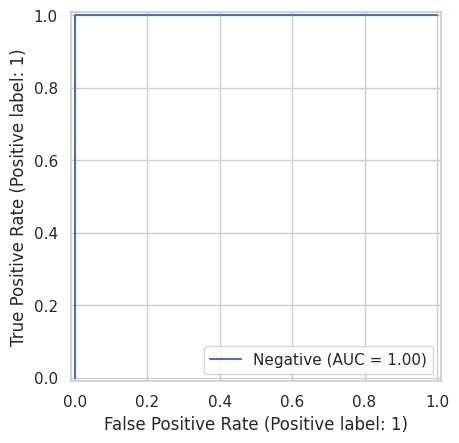

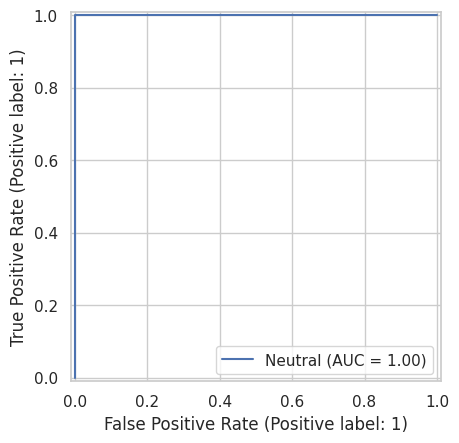

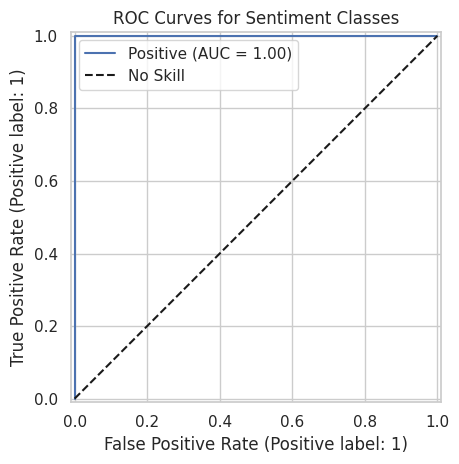

In [34]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Re-binarize for ROC-AUC (multiclass)
Y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = Y_bin.shape[1]

# Use best performing model or Logistic Regression here
best_model = models["Logistic Regression"]
pipeline = make_pipeline(
    TfidfVectorizer(stop_words="english", max_features=3000),
    OneVsRestClassifier(LogisticRegression(max_iter=200))
)
pipeline.fit(X_train, y_train)
y_score = pipeline.predict_proba(X_test)

# Calculate ROC-AUC for each class
roc_auc = {}
for i in range(n_classes):
    roc_auc[le.classes_[i]] = roc_auc_score(Y_bin[:, i], y_score[:, i])

# Display results
print("🎯 ROC-AUC by Class:")
for label, score in roc_auc.items():
    print(f"{label}: {score:.3f}")

# Optional: Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    RocCurveDisplay.from_predictions(Y_bin[:, i], y_score[:, i], name=le.classes_[i])

plt.title("ROC Curves for Sentiment Classes")
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.legend()
plt.tight_layout()
plt.show()


#Perfect! A side-by-side comparison table of all model metrics will help you:

✅ See which model performs best overall

✅ Compare precision, recall, and F1-score for the Negative class

✅ Decide which model to use in production or reporting

✅ 📦 Add This Block at the End of Your Colab Notebook:
# New section









,Model,Accuracy,Negative Precision,Negative Recall,Negative F1,Neutral F1,Positive F1
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0
1,Naive Bayes,1.0,1.0,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0,1.0,1.0
3,Random Forest,1.0,1.0,1.0,1.0,1.0,1.0


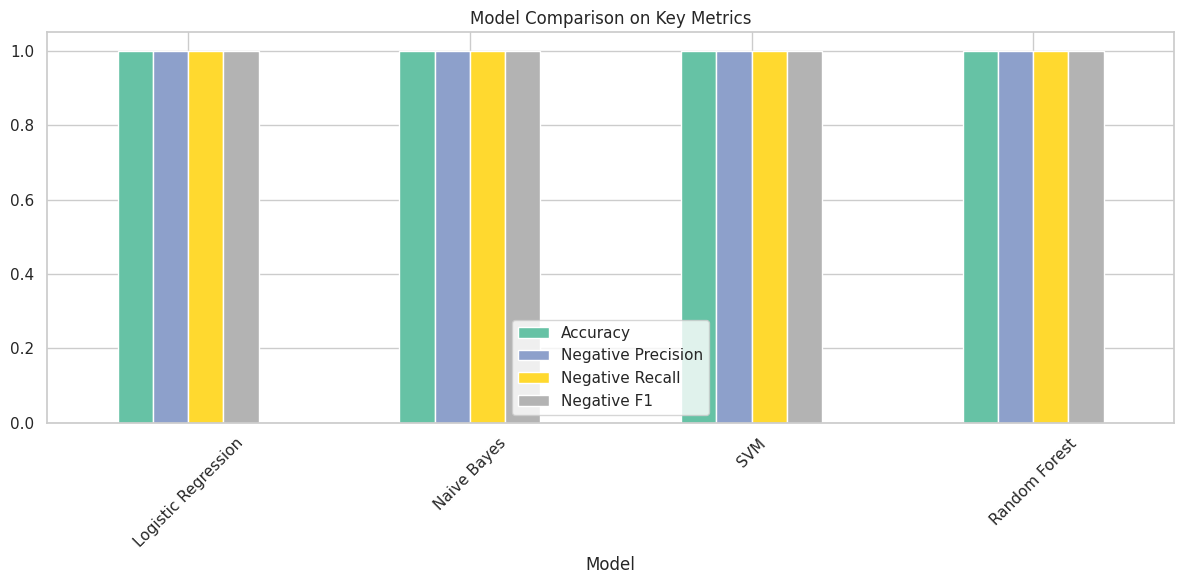

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize results summary table
comparison = []

# Loop through each model again to collect metrics
for name, result in results.items():
    y_pred = result["model"].predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average=None, zero_division=0)
    rec = recall_score(y_test, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_test, y_pred, average=None, zero_division=0)

    comparison.append({
        "Model": name,
        "Accuracy": acc,
        "Negative Precision": prec[0],
        "Negative Recall": rec[0],
        "Negative F1": f1[0],
        "Neutral F1": f1[1],
        "Positive F1": f1[2]
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(comparison)

# Format table for readability
metrics_df = metrics_df.sort_values(by="Negative F1", ascending=False).round(3)
display(metrics_df)

# Optional: Bar plot for visual comparison
metrics_df.plot(
    x="Model",
    y=["Accuracy", "Negative Precision", "Negative Recall", "Negative F1"],
    kind="bar",
    figsize=(12, 6),
    title="Model Comparison on Key Metrics",
    colormap="Set2"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#PHASE 7: STRUCTURING THE OUTPUT TABLE

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

# Reload cleaned dataset
df = pd.read_csv("/content/Cleaned_Merged_All_Data.csv")
df = df.dropna(subset=["review_text"])

# Use only text and metadata
df["instructor_id"] = df["instructor_id"].astype(str)
df["category"] = df["category"].astype(str)
df["full_text"] = df["review_text"] + " category_" + df["category"] + " instructor_" + df["instructor_id"]

# Use best trained model
final_model = results["Logistic Regression"]["model"]
vectorizer = final_model.named_steps["tfidfvectorizer"]
classifier = final_model.named_steps["logisticregression"]

# TF-IDF transform
X_vectorized = vectorizer.transform(df["full_text"])

# Get predictions
sentiment_preds = classifier.predict(X_vectorized)
probas = classifier.predict_proba(X_vectorized)
confidence = np.max(probas, axis=1)

# Scale the sentiment score to -1 (negative), 0 (neutral), 1 (positive)
sentiment_map = {0: -1, 1: 0, 2: 1}
sentiment_score = [sentiment_map[p] for p in sentiment_preds]
sentiment_label = le.inverse_transform(sentiment_preds)

# Extract keywords
top_keywords = vectorizer.inverse_transform(X_vectorized)
keyword_tags = ["; ".join(words[:5]) for words in top_keywords]

# OPTIONAL: Dummy placeholder for topic modeling
dominant_topic = ["pace" if "fast" in text.lower() else "clarity" for text in df["review_text"]]

# Build structured output DataFrame
structured_output = pd.DataFrame({
    "review_id": df["review_id"],
    "sentiment_score": sentiment_score,
    "sentiment_label": sentiment_label,
    "dominant_topic": dominant_topic,
    "keyword_tags": keyword_tags,
    "confidence_level": confidence.round(3)
})

# Export to CSV
structured_output_path = "/content/Structured_Sentiment_Output.csv"
structured_output.to_csv(structured_output_path, index=False)

# Optional: Download the file
from google.colab import files
files.download(structured_output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>